In [5]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

'Referência do projeto: https://www.youtube.com/watch?v=NOOub5Wu2UY&t=530s'
'Referência dos dados: https://www.infomoney.com.br/cotacoes/b3/acao/azul-azul4/'

'APF: Referencia do CSV'

In [6]:
# Importar arquivo CSV
df = pd.read_csv('AZUL.csv')

In [7]:
# Novo Dataframe com as colunas Data e Fechamento
novo_df = df[['DATA','FECHAMENTO']].copy()
novo_df.columns = ['Data','Fechamento']


# Substituir as vírgulas por pontos, na coluna Fechamento
novo_df['Fechamento'] = novo_df['Fechamento'].str.replace(',','.').astype(float)


# Exportar o DataFrame, para um novo CSV
#print(novo_df_azul)
novo_df.to_csv('NOVO_AZUL.csv',index=False)

In [8]:
# Começo das Análises
# 1.Preço médio dos papéis no período
#APF: trazer o periodo e mostrar junto com o preco medio

preco_medio = novo_df['Fechamento'].mean()
print(f'Preço médio das ações: R$ {preco_medio:.2f}')

Preço médio das ações: R$ 15.22


In [9]:
#2. Preços máximo e mínimo
preco_maximo = novo_df['Fechamento'].max()
data_maximo = novo_df.loc[novo_df['Fechamento'].idxmax(),'Data']


preco_minimo = novo_df['Fechamento'].min()
data_minimo = novo_df.loc[novo_df['Fechamento'].idxmin(),'Data']


# Mostrar os valores
print(f'Preço máximo de R$: {preco_maximo:.2f}, no dia {data_maximo}')
print(f'Preço mínimo de R$: {preco_minimo:.2f}, no dia {data_minimo}')

Preço máximo de R$: 17.80, no dia 28/11/2023
Preço mínimo de R$: 12.55, no dia 17/01/2024


In [10]:
#3. Compra e Venda de Ações, Lucro ou prejuízo?
acoes_adquiridas = 2000
data_aquisicao = novo_df.iloc[9]['Data']
preco_aquisicao = novo_df.iloc[9]['Fechamento']


data_venda = novo_df.iloc[47]['Data']
preco_venda = novo_df.iloc[47]['Fechamento']


valor_investido = acoes_adquiridas * preco_aquisicao
valor_venda = acoes_adquiridas * preco_venda


lucro_prejuizo = valor_venda - valor_investido

print(f'Valor total das ações no dia 48: R$ {valor_venda:.2f}')
print(f'O investidor teve {"lucro" if lucro_prejuizo > 0 else "prejuizo"} de R$: {abs(lucro_prejuizo):.2f}')
#APF: colocar preço das ações na compra e na venda

Valor total das ações no dia 48: R$ 35000.00
O investidor teve lucro de R$: 8500.00


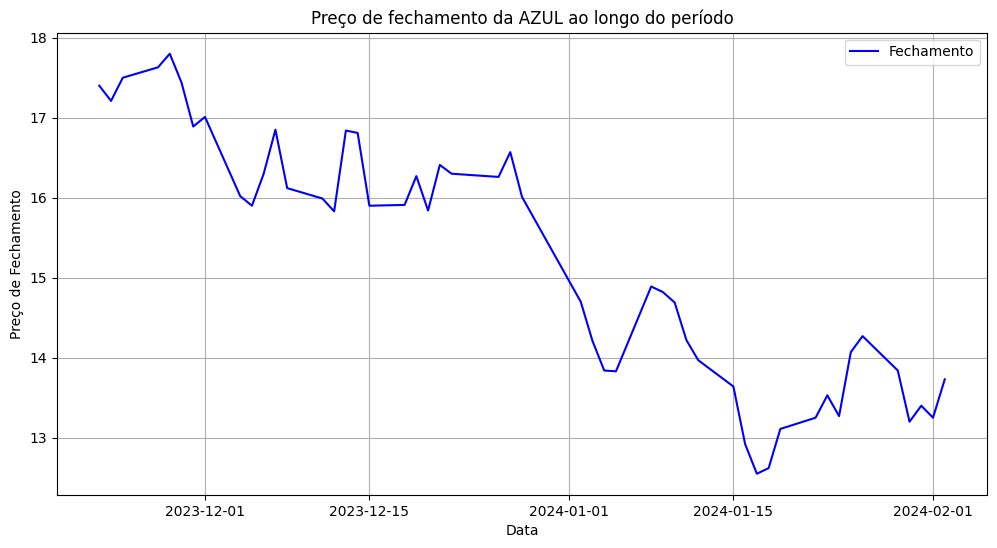

In [11]:
#4. Gráfico de evolução dos preços

#Converter a coluna Data para formato datetime
novo_df['Data'] = pd.to_datetime(novo_df['Data'], format="%d/%m/%Y")

#Criar gráfico
plt.figure(figsize=(12,6))
plt.plot(novo_df['Data'],novo_df['Fechamento'],label='Fechamento', color='blue')
plt.title('Preço de fechamento da AZUL ao longo do período')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()